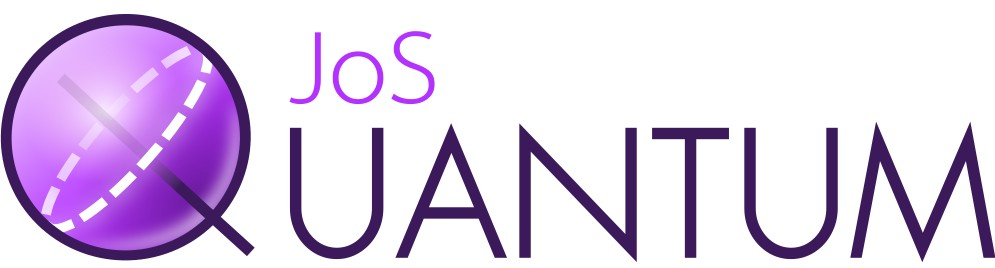

In [269]:
Image(filename='logo_josquantum_dunkel.jpeg',width=500)

# Introduction to Quantum Computing

- Qubits
- Bloch sphere
- Gates and Circuits
- Measurements
- Registers
- Phase kick-back
- Grover search

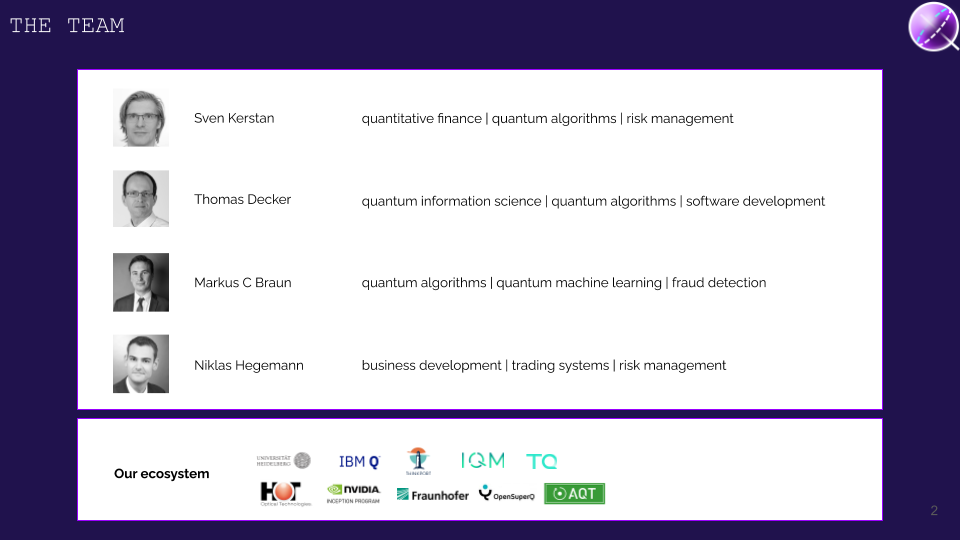

In [17]:
Image(filename='Jos_Quantum_Team.png',width=1200)

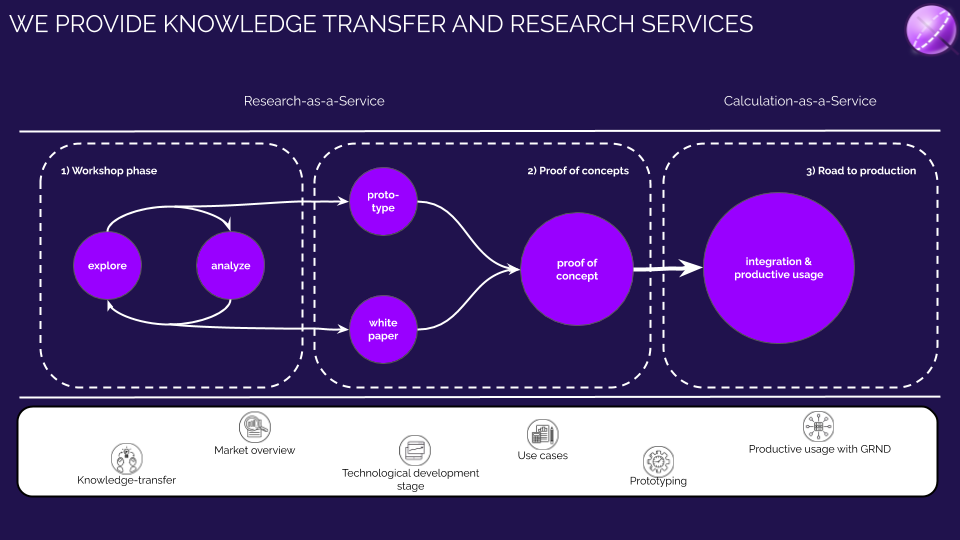

In [16]:
Image(filename='Jos_Quantum_raas.png',width=1200)

In [5]:
from IPython.display import Image
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute
from qiskit import Aer
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_state_city
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_vector
from qiskit.aqua.algorithms import AmplitudeEstimation
from qiskit.circuit.library import QFT,XGate,ZGate
from math import pi

import math
import cmath
import random
import numpy as np

import matplotlib.pyplot as plt
from scipy.stats import norm

def num2bin(x,r):
    res=""
    buffer=x
    for i in range(r):
        m=buffer%2
        res=res+str(m)
        buffer=(buffer-m)//2
    return res[::-1]

# Qubits

- Fundamental unit of quantum information 
- Systems with two states (e.g., ions, spin, path of photon)
- Normalized vector in $\mathbb{C}^2$ (pure state)
- Superposition (linear combination) of states
- Infinite number of states possible


# Dirac's Bra-Ket notation

- $| \psi \rangle=\left(\begin{array}{c} \alpha \\ \beta \end{array}\right) \in \mathbb{C}^{2\times 1}$
and $\langle \psi |=\left( \begin{array}{cc} {\overline \alpha} , \; {\overline \beta}\end{array}\right)
\in \mathbb{C}^{1\times 2}$ with
$|\langle \psi | \psi \rangle|^2=1$

- $\alpha$ and $\beta$ are called amplitudes

- Scalar product $\langle \psi | | \psi \rangle = \langle \psi | \psi \rangle$

- Projection $\left(|\psi \rangle \langle \psi |\right)|x\rangle = |\psi \rangle \langle \psi| |x \rangle=\langle \psi | x \rangle |\psi\rangle$

- Basis states $|0\rangle = \left(\begin{array}{c} 1 \\ 0 \end{array}\right)$ and $|1\rangle = \left(\begin{array}{c} 0 \\ 1 \end{array}\right)$

- Projections $|0\rangle\langle 0|=\left(\begin{array}{cc}1&0\\0&0\end{array}\right) \quad
|1\rangle\langle 1|=\left(\begin{array}{cc}0&0\\0&1\end{array}\right)$

- State in standard basis $|\psi\rangle = \alpha |0\rangle + \beta |1\rangle$ with $ |\alpha|^2 + |\beta|^2 = 1 $ (normalization due to probabilities)

- Examples for superpositions: $|h_0\rangle=\sqrt{\frac{1}{2}}\left(\begin{array}{c} 1 \\ 1 \end{array}\right)$
and $|h_1\rangle=\sqrt{\frac{1}{2}}\left(\begin{array}{c} 1 \\ -1 \end{array}\right)$

# Representation of Qubit States in Bloch Sphere

- Represent $|\psi\rangle \in \mathbb{C}^2$ as $v \in \mathbb{R}^3$


- Trace formula $\left( \begin{array}{c}x\\y\\z\end{array}\right)=\left(\begin{array}{c} {\rm tr}\left(\sigma_x |\psi\rangle \langle \psi | \right)\\{\rm tr}\left(\sigma_y |\psi\rangle \langle \psi | \right)\\{\rm tr}\left(\sigma_z |\psi\rangle \langle \psi | \right)\end{array}\right)$ 
with $\sigma_x=\left(\begin{array}{cc}0&1\\1&0\end{array}\right) \quad
\sigma_y=\left(\begin{array}{cc}0&-i\\i&0\end{array}\right)\quad 
\sigma_z=\left(\begin{array}{cc}1&0\\0&-1\end{array}\right)$

- Pauli operators $\sigma_x, \sigma_y, \sigma_z$

- Orthogonal states are mapped to opposite directions

- This representation is for one qubit only ($n$ Bloch spheres not sufficient for $n$ qubits)

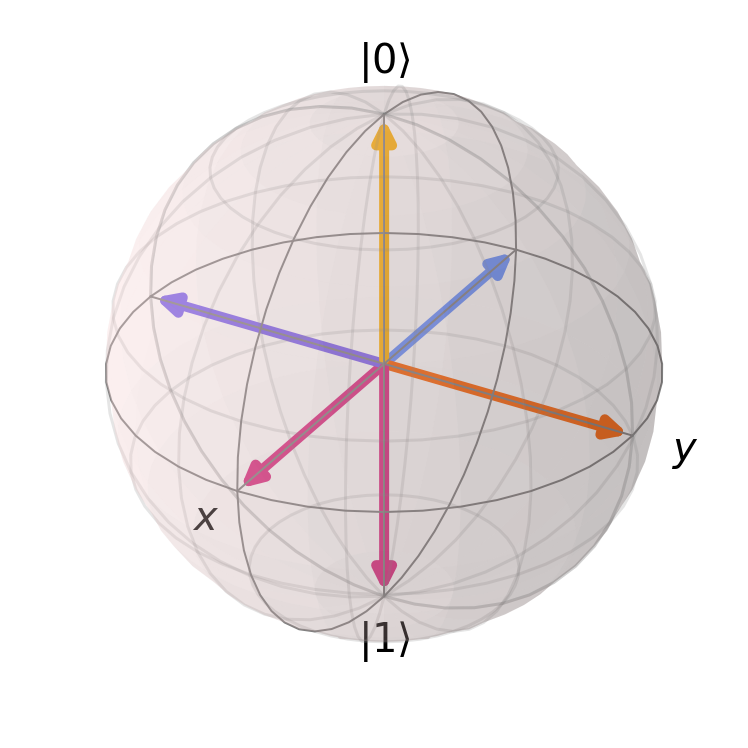

In [2]:
vectors=[[1,0,0],[-1,0,0],[0,1,0],[0,-1,0],[0,0,1],[0,0,-1]]
plot_bloch_vector(vectors)

# Operations on Qubits

- Action on qubit, e.g., laser shot on ion, magnetic field for spin, beam splitter for photons
- Unitary operation $U \in \mathbb{C}^{2\times 2}$ with $U U^\dagger = U^\dagger U=I_2$ (inverse operation always exists)
- State $|\psi\rangle$ mapped to $U|\psi\rangle$
- $\sigma_x |0\rangle=|1\rangle \quad \sigma_x |1\rangle=|0\rangle$ (NOT operation)
- $\sigma_z |0\rangle=|0\rangle \quad \sigma_z |1\rangle=-|1\rangle$
- Hadamard operator $H=\sqrt{\frac{1}{2}}\left( \begin{array}{cc}1&1\\1&-1\end{array}\right)$
- Hadamard creates superposition from basis states: $H|0\rangle=\sqrt{\frac{1}{2}}\left(\begin{array}{c}1\\1\end{array}\right) \quad H|1\rangle=\sqrt{\frac{1}{2}}\left(\begin{array}{c}1\\-1\end{array}\right)$
- Qiskit $u_3(\theta, \phi, \lambda)=\left(\begin{array}{cc}{\rm cos}(\theta/2)&-e^{i \lambda}{\rm sin}(\theta/2)\\e^{i\phi}{\rm sin}(\theta/2)&e^{i(\phi+\lambda)}{\rm cos}(\theta/2)\end{array}\right)$

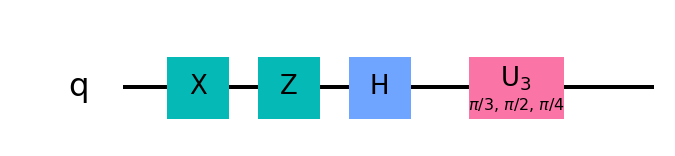

In [3]:
q = QuantumRegister(1, 'q')
circ = QuantumCircuit(q)
circ.x(q)
circ.z(q)
circ.h(q)
circ.u3(math.pi/3,math.pi/2,math.pi/4,q)
circ.draw(output='mpl')

- Circuit is read from left to right
- Each gate is an operation on a qubit
- Qubit is initialized with state $|0\rangle$

# Measurements

- Unknown state $|\psi\rangle$ can be determined only by measurement
- Consider measurement in standard basis $|0\rangle,|1\rangle$
- Measurement device shows $0$ or $1$ as result (classical information)
- $|\psi\rangle = \alpha |0\rangle + \beta |1\rangle$ leads to $|0\rangle$ and $|1\rangle$ with probabilities $ |\alpha|^2$ and $|\beta|^2$, respectively
- Project $|\psi\rangle$ to $|x\rangle$ with probability $|\langle x | \psi \rangle|^2$ for $x \in \{0,1\}$
- State is changed by a non-unitary transform (not reversible, "collapse of wave function")

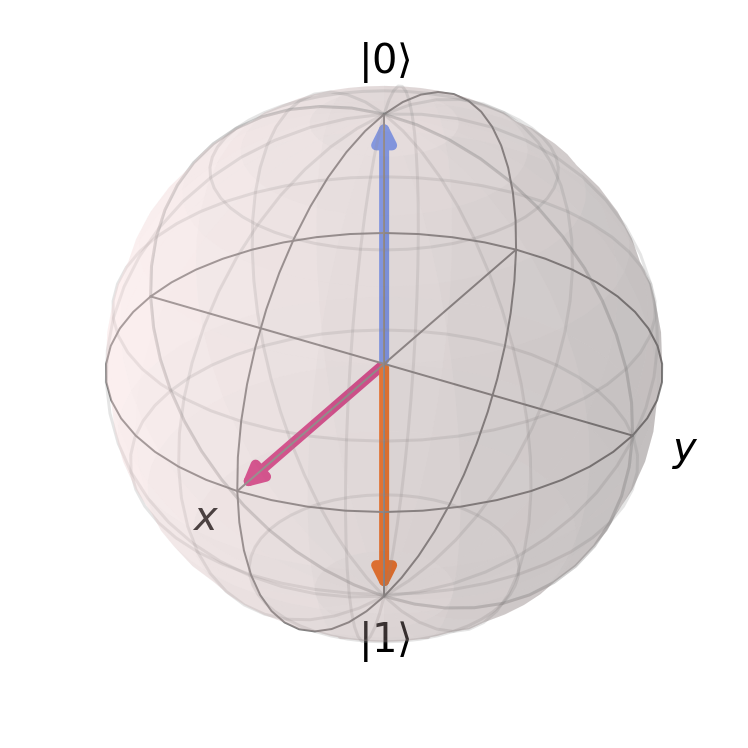

In [4]:
vectors=[
    [1,0,0], # states (1,1)/sqrt(2)
    [0,0,1],[0,0,-1]  # measurement (1,0), (0,1)
        ]
plot_bloch_vector(vectors)

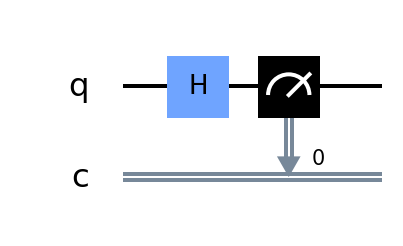

In [273]:
q = QuantumRegister(1, 'q')
c = ClassicalRegister(1, 'c')
circ = QuantumCircuit(q,c)
circ.h(q)
circ.measure(q,c)
circ.draw(output='mpl')

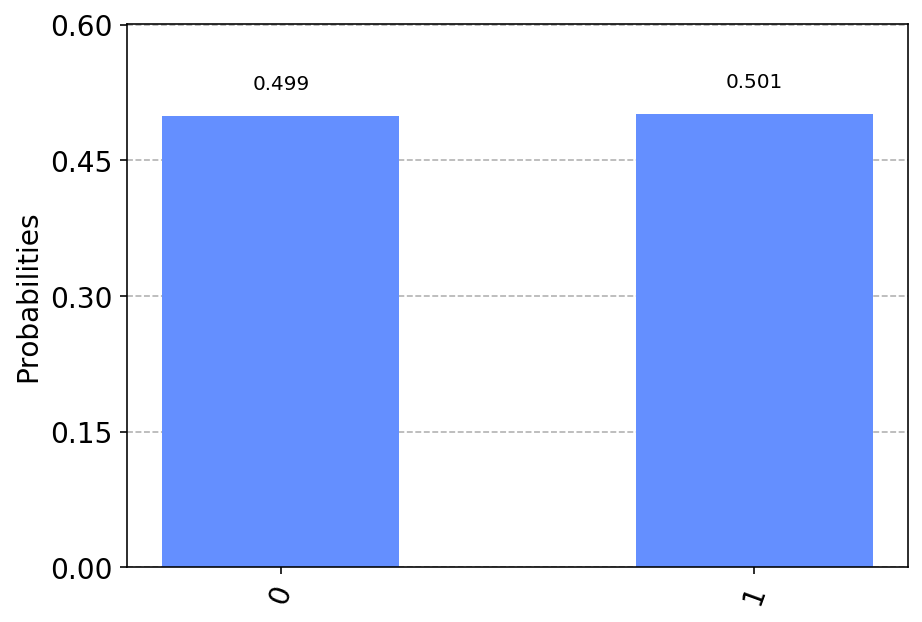

In [276]:
backend = Aer.get_backend('qasm_simulator')
job = execute(circ, backend,shots=8192)
result = job.result()
countsSim=result.get_counts()
plot_histogram(countsSim)

- Run experiment on real hardware
- Compare result to simulator result

In [278]:
from qiskit import IBMQ
# Enter account key here!
#provider= IBMQ.enable_account("...")
for b in provider.backends():
    print(b)

ibmq_qasm_simulator
ibmqx2
ibmq_16_melbourne
ibmq_vigo
ibmq_ourense
ibmq_valencia
ibmq_armonk
ibmq_athens
ibmq_santiago


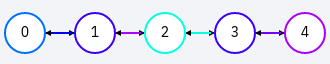

In [280]:
Image(filename='athens.png',width=500)

{'0': 4024, '1': 4168}


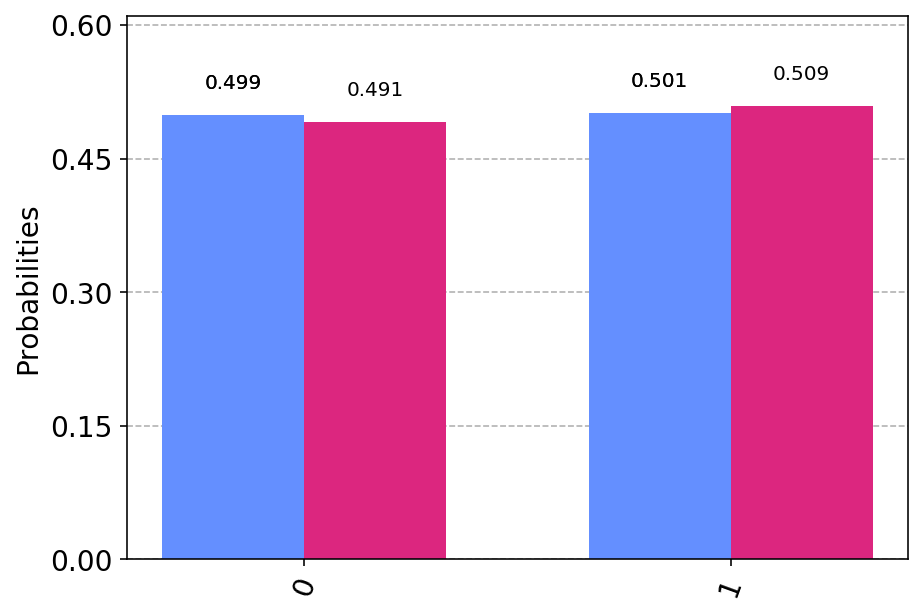

In [277]:
shotNumber=8192
backend = provider.get_backend(name='ibmq_athens')
job = execute(circ, backend,shots=shotNumber)
countReal=job.result().get_counts()
print(countReal)
plot_histogram([countsSim,countReal])

- Can be used as random number generator

# Accessible Information of Qubits

- Idea: Many different states can be encoded in a qubit
- Calculations with these states are possible
- However, we need measurements at the end to obtain result
- Can more than 1 bit be transmitted with a qubit?

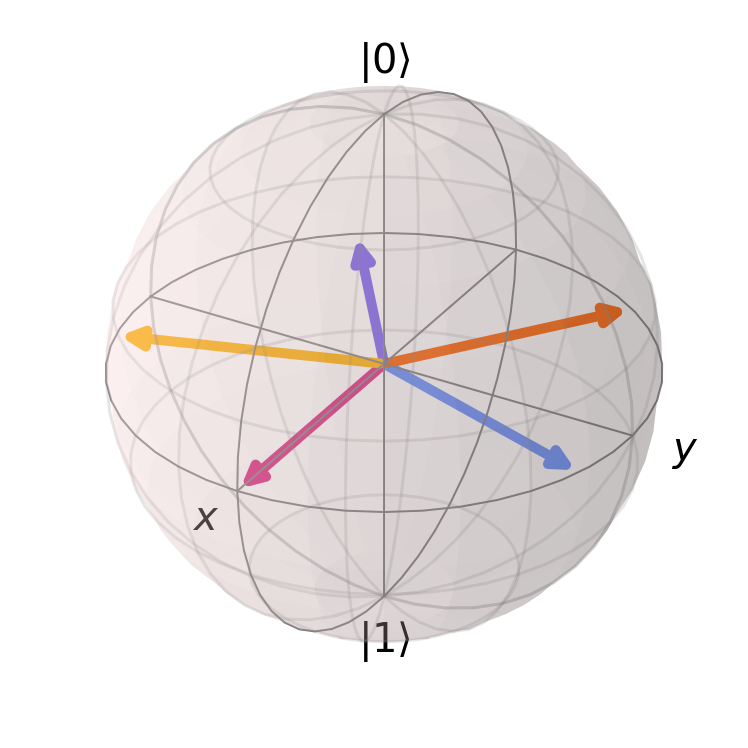

In [6]:
n=5
vectors=[]
for i in range(5):
    vectors.append([math.cos(2*math.pi*i/n),math.sin(2*math.pi*i/n),0])
plot_bloch_vector(vectors)

- Problem: overlap $\langle \psi_i | \psi_j \rangle \not=0$ (non-orthogonal states)
- Measurements cannot resolve these states without error
- Holevo's theorem: $n$ qubits $\Rightarrow$ at most $n$ bit information can be transmitted

# Qubit Registers

- Several qubits together with multi-qubit operations

- Linear in each component $\Rightarrow$ tensor product

- Calculate tensor product: $\left(\begin{array}{c}\alpha\\\beta\end{array}\right) \otimes \left( \begin{array}{c}\gamma \\ \delta \end{array}\right)
=\left(\begin{array}{c}\alpha \gamma \\ \alpha \delta \\ \beta \gamma \\ \beta \delta \end{array}\right)$

- $|00\rangle = |0\rangle \otimes |0\rangle=\begin{pmatrix} 1 \\ 0 \end{pmatrix} \otimes \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix}
\quad\quad\quad
|01\rangle = |0\rangle \otimes |1\rangle= \begin{pmatrix} 1 \\ 0 \end{pmatrix} \otimes \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} 0 \\ 1 \\ 0 \\ 0 \end{pmatrix}$ 

- $|10\rangle = |1\rangle \otimes |0\rangle= \begin{pmatrix} 0 \\ 1 \end{pmatrix} \otimes \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix}
\quad\quad\quad
|11\rangle = |1\rangle \otimes |1\rangle=\begin{pmatrix} 0 \\ 1 \end{pmatrix} \otimes \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \\ 1 \end{pmatrix} $

- $ |\psi\rangle = \alpha |00\rangle + \beta |01\rangle + \gamma |10\rangle + \delta |11\rangle = |\psi\rangle = \alpha \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix} + \beta \begin{pmatrix} 0 \\ 1 \\ 0 \\ 0 \end{pmatrix} + \gamma \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix} + \delta \begin{pmatrix} 0 \\ 0 \\ 0 \\ 1 \end{pmatrix} $ with $|\langle \psi | \psi \rangle|^2=1$

- $n$ Qubits: $|\psi\rangle \in \mathbb{C}^{N}$ with $N=2^n$

- Simulation is hard for $n>20$ (in general, we need $O(2^n)$ floats)

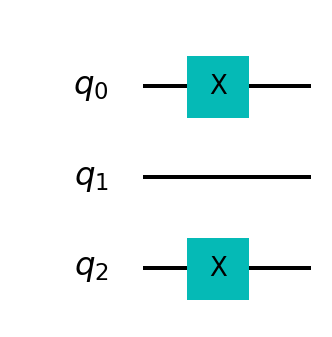

In [7]:
q = QuantumRegister(3, 'q')
circ = QuantumCircuit(q)
circ.x(q[0])
circ.x(q[2])
circ.draw(output='mpl')

In [8]:
backend = Aer.get_backend('statevector_simulator')
job = execute(circ, backend)
result = job.result()
v=result.get_statevector()
for i in range(len(v)):
    print(num2bin(i,3),"->",int(round(np.real(v[i]))))

000 -> 0
001 -> 0
010 -> 0
011 -> 0
100 -> 0
101 -> 1
110 -> 0
111 -> 0


# Operations on Quantum Registers

- Unitary operations $U \in \mathbb{C}^{N\times N}$ with $N=2^n$
- $U$ and $V$ on sub systems $\Rightarrow$ $U \otimes V$ (Kronecker product) on whole system
- Operations on single qubits can act on the exponentially large space $\mathbb{C}^N$ in a non-trivial way
- Example: $\left( \psi_0, \psi_1, \ldots, \psi_{N-2},\psi_{N-1}\right) \mapsto \left(\psi_1, \psi_0, \ldots, \psi_{N-1},\psi_{N-2}\right)$ in $\mathbb{C}^N$ with $N=2^n$

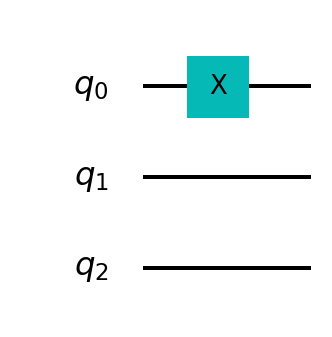

In [9]:
q = QuantumRegister(3, 'q')
circ = QuantumCircuit(q)
circ.x(q[0])
circ.draw(output='mpl')

In [28]:
backend = Aer.get_backend('unitary_simulator')
job = execute(circ, backend)
result = job.result()
u=result.get_unitary()
for i in range(len(u)):
    for j in range(len(u)):
        print(int(np.real(u[i][j])),end=' ')
    print()

0 1 0 0 0 0 0 0 
1 0 0 0 0 0 0 0 
0 0 0 1 0 0 0 0 
0 0 1 0 0 0 0 0 
0 0 0 0 0 1 0 0 
0 0 0 0 1 0 0 0 
0 0 0 0 0 0 0 1 
0 0 0 0 0 0 1 0 


- Decomposition $U\otimes V \in \mathbb{C}^{N \times N}$ not possible in general
- Elementary multi-qubit gates necessary
- Example: controlled operations $|x\rangle |y\rangle |z\rangle \mapsto |x\rangle|y\rangle|(z + x y)\;{\rm mod}\;2\rangle$
- Operates on smaller part of the whole state space
- Harder to implement than uncontrolled operations (on many hardware platforms)
- Some operations need only ${\rm poly}(n)$ many elementary gates, e.g., Fourier transform

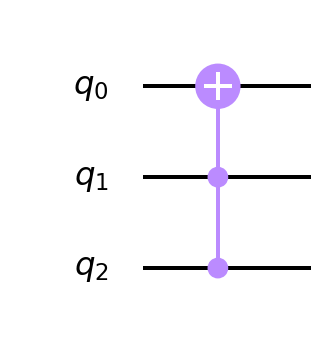

In [10]:
q = QuantumRegister(3, 'q')
circ = QuantumCircuit(q)
circ.ccx(q[1],q[2],q[0])
circ.draw(output='mpl')

In [11]:
backend = Aer.get_backend('unitary_simulator')
job = execute(circ, backend)
result = job.result()
u=result.get_unitary()
for i in range(len(u)):
    for j in range(len(u)):
        print(int(np.real(u[i][j])),end=' ')
    print()

1 0 0 0 0 0 0 0 
0 1 0 0 0 0 0 0 
0 0 1 0 0 0 0 0 
0 0 0 1 0 0 0 0 
0 0 0 0 1 0 0 0 
0 0 0 0 0 1 0 0 
0 0 0 0 0 0 0 1 
0 0 0 0 0 0 1 0 


- Operations are unitary $\Rightarrow$ operations are reversible
- Example: $|x\rangle|y\rangle\mapsto |x\rangle|x \land y\rangle$ does not work
- Make operations reversible: $|x\rangle|y\rangle|z\rangle\mapsto |x\rangle|y\rangle|(z+f(x,y))\;{\rm mod}\;2\rangle$
- Example AND: $|x\rangle|y\rangle|0\rangle\mapsto|x\rangle|y\rangle|x\land y\rangle$ with double controlled NOT

# Phase Kick-Back and Phase Estimation

- Apply controlled $U$ gate on eigenvector state $|u\rangle$ with eigenvalue $e^{2\pi i \lambda}$
- Phase aquired on control qubit: $\left(|0\rangle + |1\rangle\right)|u\rangle = |0\rangle|u\rangle + |1\rangle|u\rangle \mapsto \left(|0\rangle + e^{2\pi i \lambda}|1\rangle\right)|u\rangle$ (controlled qubit with state $|u\rangle$ unchanged, hence "kick-back")
- Apply $U^{K}$ for $K=2^k$ to obtain $\left(|0\rangle + e^{2\pi i \lambda}|1\rangle\right)$, $\left(|0\rangle + e^{2\pi i 2 \lambda}|1\rangle\right)$, $\left(|0\rangle + e^{2\pi i 4 \lambda}|1\rangle\right)$, ...
- Approximation of $\lambda$ can be found in binary representation by Fourier transform
- Example with 3 qubits

|phase | binary encoding|
|------|-------|
| $0\cdot\pi/4$ | 000 |
| $1\cdot\pi/4$ | 100 |
| $2\cdot\pi/4$ | 010 |
| $3\cdot\pi/4$ | 110 |
| $4\cdot\pi/4$ | 001 |
| $5\cdot\pi/4$ | 101 |
| $6\cdot\pi/4$ | 011 |
| $7\cdot\pi/4$ | 111 |

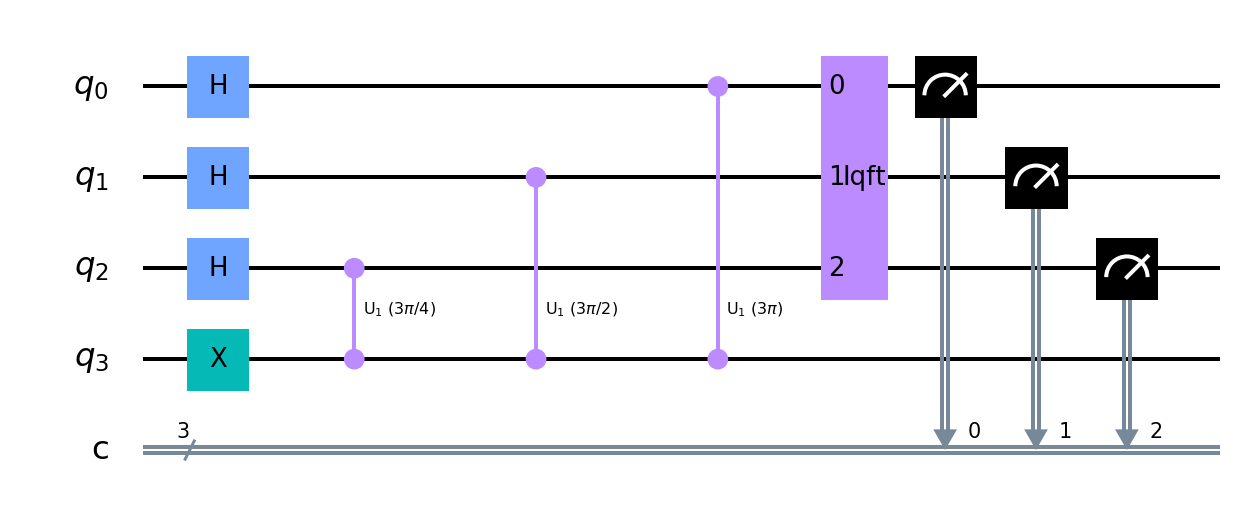

In [13]:
lambd=3*math.pi/4

q = QuantumRegister(4, 'q')
c = ClassicalRegister(3, 'c')
circ = QuantumCircuit(q,c)
circ.h(q[0])
circ.h(q[1])
circ.h(q[2])
circ.x(q[3])
circ.cu1(1*lambd,q[2],q[3])
circ.cu1(2*lambd,q[1],q[3])
circ.cu1(4*lambd,q[0],q[3])
circ.append(QFT(3,do_swaps=True).inverse(),q[0:3])
circ.measure([q[0],q[1],q[2]],c)
circ.draw(output='mpl')

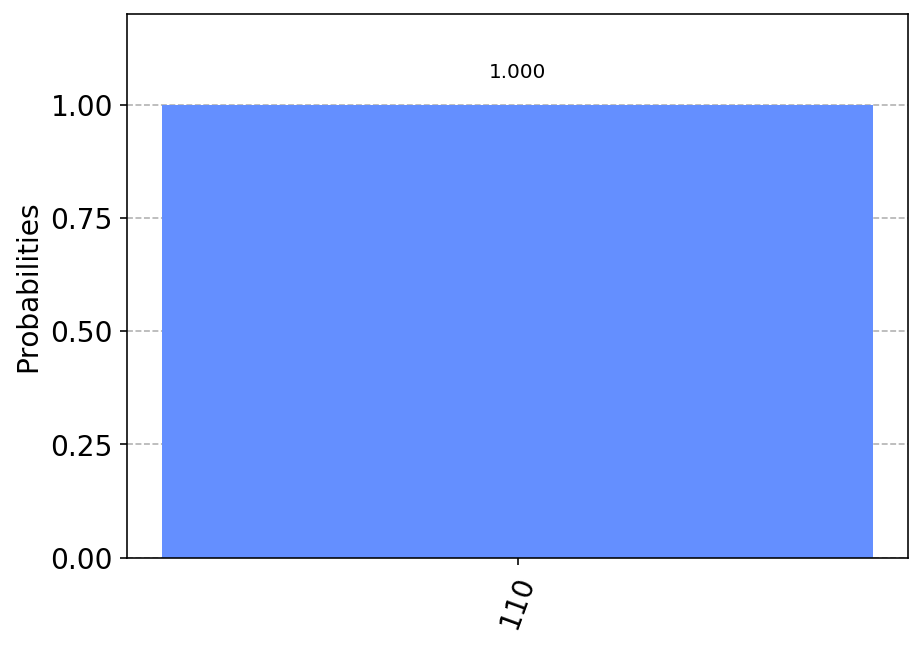

In [14]:
backend = Aer.get_backend('qasm_simulator')
job = execute(circ, backend,shots=10000)
result = job.result()
plot_histogram(result.get_counts())

# Grover Search Algorithm

- Function $f(x) \in \{0,1\}^n$ is given, goal is to find $x$ with $f(x)=1$
- Define unitary $U_f|x\rangle = (-1)^{f(x)}|x\rangle$
- Define  $U_0$ with $U_0 |0\rangle = |0\rangle$ and $U_0|x\rangle = -|x\rangle$ for $x\not=0$
- Construct Grover operator $(H\otimes \ldots \otimes H)U_0(H\otimes \ldots \otimes H)U_f$
- $O(\sqrt{N})$ applications of Grover operator required (in case that $f(x)=1$ has a single solution)
- Interpretation as sequence of rotations
- Amplitude estimation is estimation of eigenvalues of Grover operator

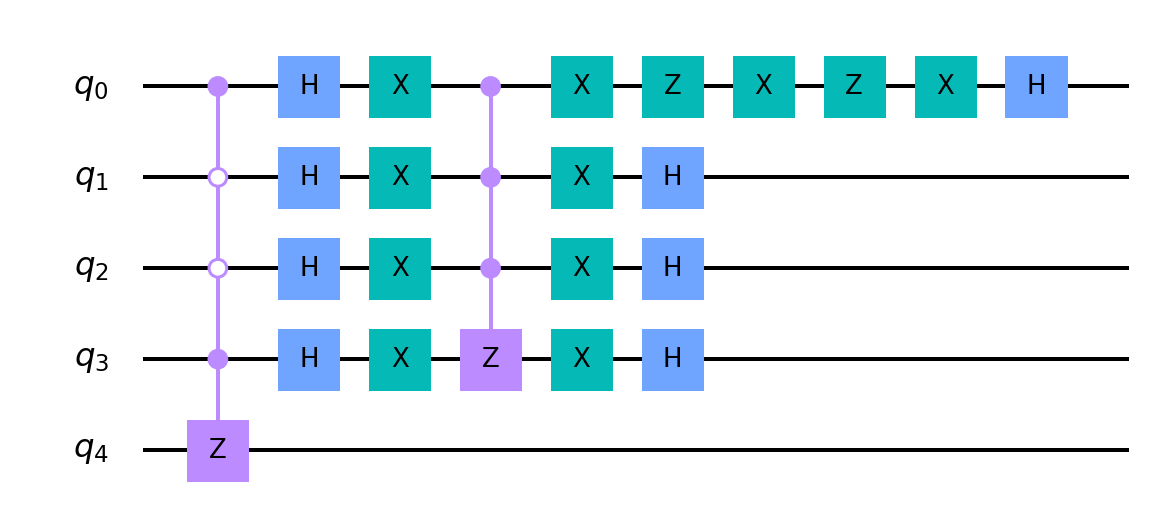

In [6]:
q = QuantumRegister(5, 'q')
circ = QuantumCircuit(q)

# Apply oracle with phase operations for f with phase operation.
circ.append(ZGate().control(num_ctrl_qubits=4,ctrl_state='1001'),q)

# Apply Hadamard gates on input space of f.
circ.h(q[0])
circ.h(q[1])
circ.h(q[2])
circ.h(q[3])

# 0 gets -1 phase, everything else +1.
circ.x(q[0])
circ.x(q[1])
circ.x(q[2])
circ.x(q[3])
circ.append(ZGate().control(3),[q[0],q[1],q[2],[3]])
circ.x(q[0])
circ.x(q[1])
circ.x(q[2])
circ.x(q[3])

# Global -1 phase
circ.z(q[0])
circ.x(q[0])
circ.z(q[0])
circ.x(q[0])

# Apply Hadamard gates again.
circ.h(q[0])
circ.h(q[1])
circ.h(q[2])
circ.h(q[3])

grover=circ.to_gate()
grover.label='grover'

circ.draw(output='mpl')

- Apply Grover operator once
- Success probability is $\approx 0.276$

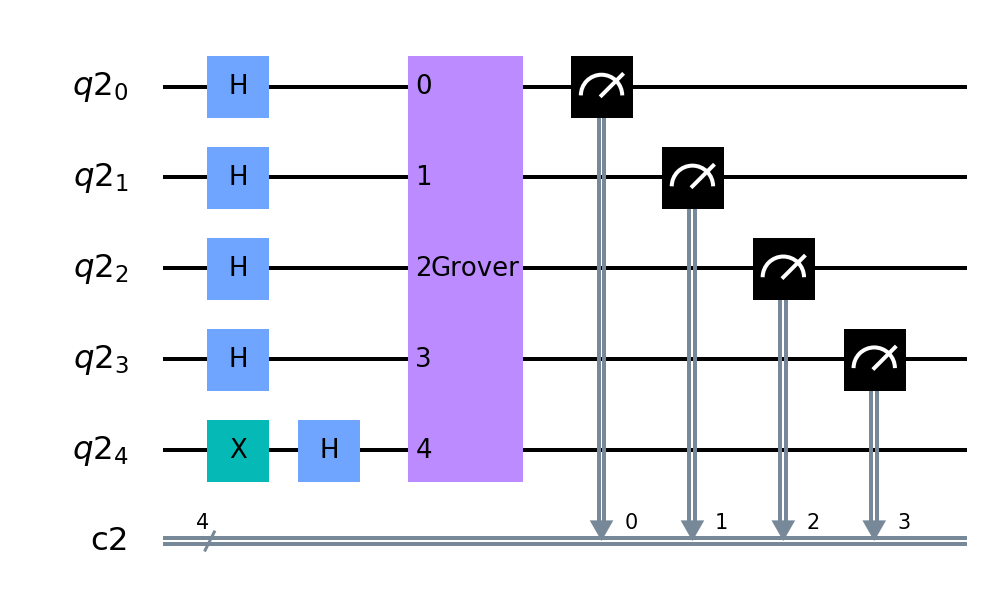

In [7]:
q2 = QuantumRegister(5, 'q2')
c2 = ClassicalRegister(4, 'c2')
circ2 = QuantumCircuit(q2,c2)
circ2.h(q2[0])
circ2.h(q2[1])
circ2.h(q2[2])
circ2.h(q2[3])
circ2.x(q2[4])
circ2.h(q2[4])

circ2.append(grover,q2)

circ2.measure([q2[0],q2[1],q2[2],q2[3]],c2)
circ2.draw(output='mpl')

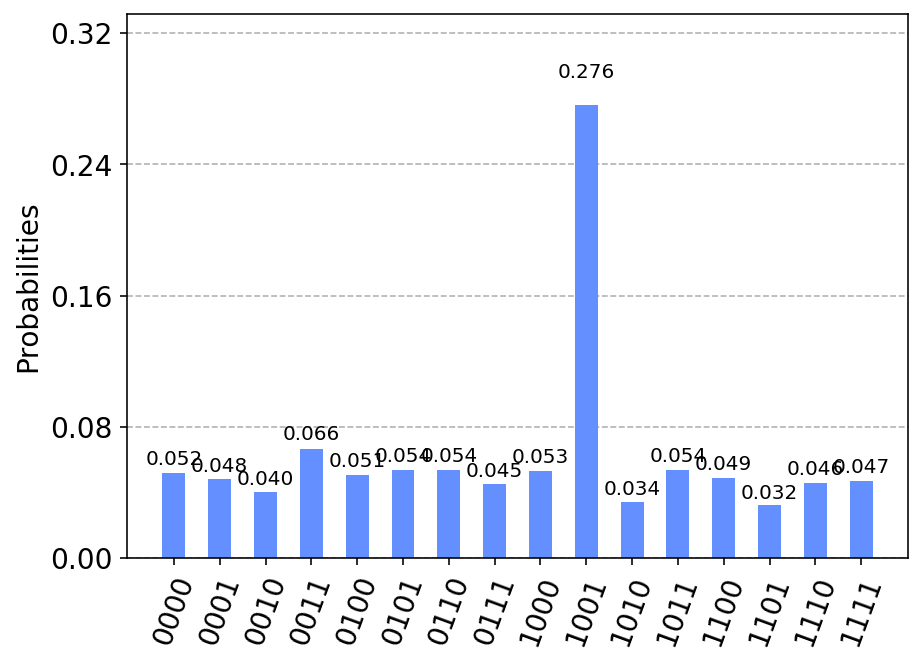

In [8]:
backend = Aer.get_backend('qasm_simulator')
job = execute(circ2, backend)
result = job.result()
plot_histogram(result.get_counts())

- Try to increase success probability with second Grover step
- Success probability increased to $\approx 0.504$

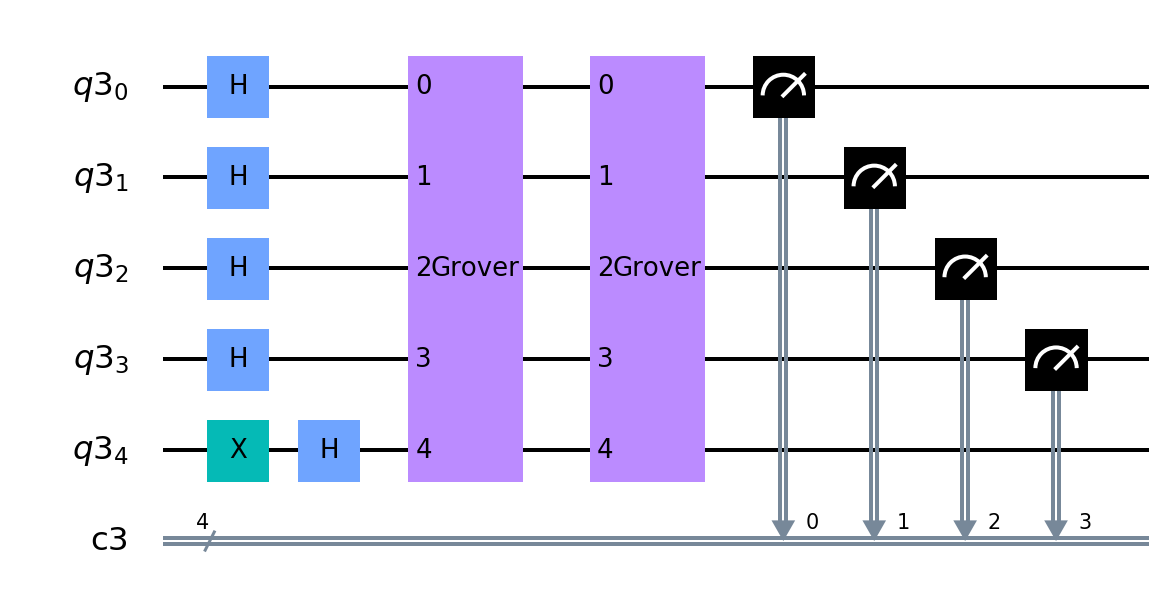

In [9]:
q3 = QuantumRegister(5, 'q3')
c3 = ClassicalRegister(4, 'c3')
circ3 = QuantumCircuit(q3,c3)
circ3.h(q3[0])
circ3.h(q3[1])
circ3.h(q3[2])
circ3.h(q3[3])
circ3.x(q3[4])
circ3.h(q3[4])

circ3.append(grover,q3)
circ3.append(grover,q3)

circ3.measure([q3[0],q3[1],q3[2],q3[3]],c3)
circ3.draw(output='mpl')

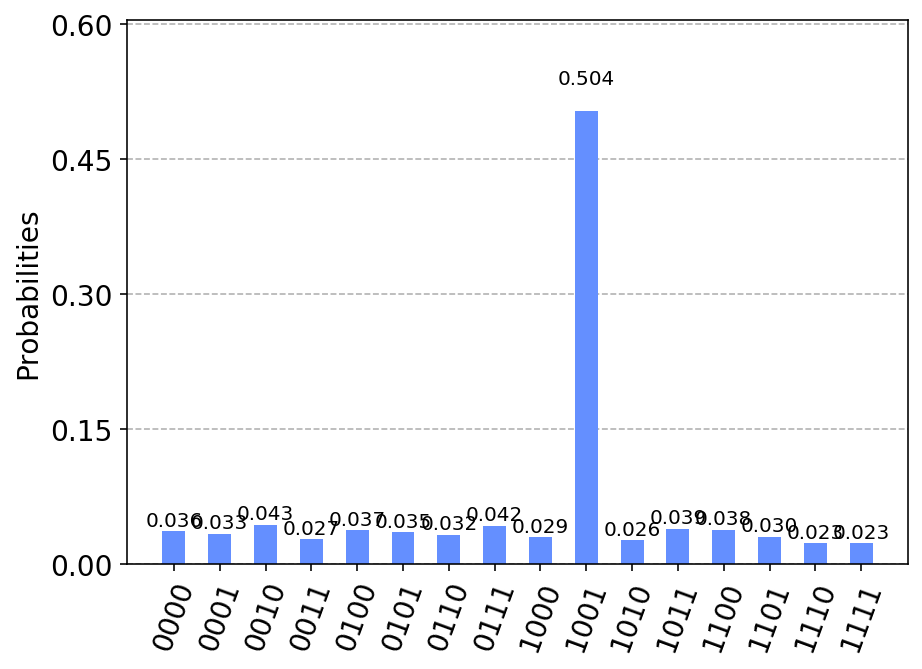

In [10]:
backend = Aer.get_backend('qasm_simulator')
job = execute(circ3, backend)
result = job.result()
plot_histogram(result.get_counts())